In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis 
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'iframe'
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import scipy.stats as stats
from scipy.stats import spearmanr

# Loading the dataset  

### Diabetes DataFrame

In [2]:
df_diab = pd.read_excel('cdc-diabetes-2018.xlsx', sheet_name = 'Diabetes')
df_diab

,YEAR,FIPS,COUNTY,STATEW,% DIABETIC
0,2018,1001,Autauga County,Alabama,9.5
1,2018,1003,Baldwin County,Alabama,8.4
2,2018,1005,Barbour County,Alabama,13.5
3,2018,1007,Bibb County,Alabama,10.2
4,2018,1009,Blount County,Alabama,10.5
...,...,...,...,...,...
3137,2018,56037,Sweetwater County,Wyoming,7.8
3138,2018,56039,Teton County,Wyoming,3.8
3139,2018,56041,Uinta County,Wyoming,8.4
3140,2018,56043,Washakie County,Wyoming,7.4


### Obesity DataFrame

In [3]:
df_obes = pd.read_excel('cdc-diabetes-2018.xlsx', sheet_name = 'Obesity')
df_obes

,YEAR,FIPS,COUNTY,STATE,% OBESE
0,2018,1011,Bullock County,Alabama,18.7
1,2018,2068,Denali Borough,Alaska,18.9
2,2018,2105,Hoonah-Angoon Census Area,Alaska,19.4
3,2018,2195,Petersburg Census Area,Alaska,17.2
4,2018,2230,Skagway Municipality,Alaska,18.3
...,...,...,...,...,...
358,2018,51820,Waynesboro City,Virginia,19.5
359,2018,51830,Williamsburg City,Virginia,18.0
360,2018,51840,Winchester City,Virginia,19.4
361,2018,53055,San Juan County,Washington,19.3


### Inactivity DataFrame

In [4]:
df_inact = pd.read_excel('cdc-diabetes-2018.xlsx', sheet_name = 'Inactivity')
df_inact.columns = df_inact.columns.str.replace('FIPDS', 'FIPS') 
df_inact

,YEAR,FIPS,COUNTY,STATE,% INACTIVE
0,2018,1011,Bullock County,Alabama,17.0
1,2018,1029,Cleburne County,Alabama,19.3
2,2018,1037,Coosa County,Alabama,16.8
3,2018,1063,Greene County,Alabama,16.8
4,2018,2013,Aleutians East Borough,Alaska,19.2
...,...,...,...,...,...
1365,2018,56027,Niobrara County,Wyoming,17.3
1366,2018,56031,Platte County,Wyoming,18.5
1367,2018,56033,Sheridan County,Wyoming,19.5
1368,2018,56035,Sublette County,Wyoming,16.7


### We have to merge the all the three DataFrames by using the common column FIPS

In [5]:
# Merging the 3 data sets
Combining_diab_obes = pd.merge(df_diab, df_obes, on = "FIPS", how= 'inner')
Combining_data = pd.merge(Combining_diab_obes, df_inact, on = "FIPS", how ='inner')
Combining_data

,YEAR_x,FIPS,COUNTY_x,STATEW,% DIABETIC,YEAR_y,COUNTY_y,STATE_x,% OBESE,YEAR,COUNTY,STATE_y,% INACTIVE
0,2018,1011,Bullock County,Alabama,9.4,2018,Bullock County,Alabama,18.7,2018,Bullock County,Alabama,17.0
1,2018,2068,Denali Borough,Alaska,6.8,2018,Denali Borough,Alaska,18.9,2018,Denali Borough,Alaska,16.2
2,2018,2105,Hoonah-Angoon Census Area,Alaska,7.3,2018,Hoonah-Angoon Census Area,Alaska,19.4,2018,Hoonah-Angoon Census Area,Alaska,15.0
3,2018,2195,Petersburg Census Area,Alaska,9.2,2018,Petersburg Census Area,Alaska,17.2,2018,Petersburg Census Area,Alaska,17.8
4,2018,2230,Skagway Municipality,Alaska,6.6,2018,Skagway Municipality,Alaska,18.3,2018,Skagway Municipality,Alaska,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2018,51820,Waynesboro City,Virginia,8.6,2018,Waynesboro City,Virginia,19.5,2018,Waynesboro City,Virginia,16.6
350,2018,51830,Williamsburg City,Virginia,8.5,2018,Williamsburg City,Virginia,18.0,2018,Williamsburg City,Virginia,15.7
351,2018,51840,Winchester City,Virginia,6.9,2018,Winchester City,Virginia,19.4,2018,Winchester City,Virginia,16.1
352,2018,53055,San Juan County,Washington,4.5,2018,San Juan County,Washington,19.3,2018,San Juan County,Washington,11.9


In [6]:
Combining_data.columns = Combining_data.columns.str.replace('YEAR_x', 'Year')
Combining_data.columns = Combining_data.columns.str.replace('COUNTY_x', 'County')
Combining_data.columns = Combining_data.columns.str.replace('STATEW', 'State')
model_data = Combining_data.drop(['YEAR_y', 'COUNTY_y', 'STATE_x','YEAR','COUNTY','STATE_y'], axis=1)
model_data

,Year,FIPS,County,State,% DIABETIC,% OBESE,% INACTIVE
0,2018,1011,Bullock County,Alabama,9.4,18.7,17.0
1,2018,2068,Denali Borough,Alaska,6.8,18.9,16.2
2,2018,2105,Hoonah-Angoon Census Area,Alaska,7.3,19.4,15.0
3,2018,2195,Petersburg Census Area,Alaska,9.2,17.2,17.8
4,2018,2230,Skagway Municipality,Alaska,6.6,18.3,15.8
...,...,...,...,...,...,...,...
349,2018,51820,Waynesboro City,Virginia,8.6,19.5,16.6
350,2018,51830,Williamsburg City,Virginia,8.5,18.0,15.7
351,2018,51840,Winchester City,Virginia,6.9,19.4,16.1
352,2018,53055,San Juan County,Washington,4.5,19.3,11.9


In [7]:
model_data.to_excel("integrated_data_sheet_final.xlsx", index = False)

# Visualizing and Analyzing the data 

As we have 3 instances which are diabetes, Inactivity, Obesity. We will analyize how the data is scattered and relationship between the two features.

### Diabetes Vs Obesity

#### ScatterPlot

In [8]:
#diabetes vs obesity
fig = px.scatter(model_data, x="% OBESE", y="% DIABETIC")
fig.show()

#### HistPlot

#### HistPlots

<Axes: xlabel='% OBESE', ylabel='% DIABETIC'>

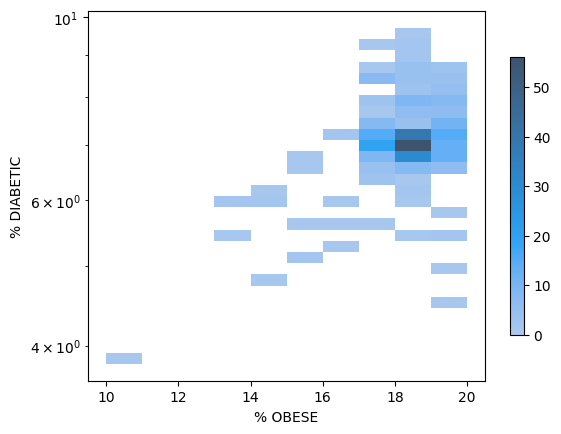

In [9]:
sns.histplot(
    model_data, x="% OBESE", y="% DIABETIC",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True, cbar_kws=dict(shrink=.75),
)

<Axes: ylabel='Count'>

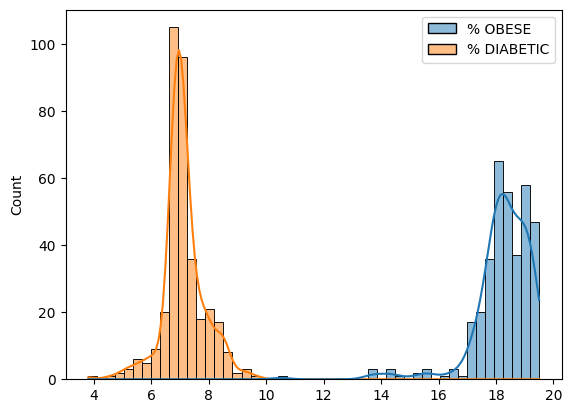

In [10]:
sns.histplot([model_data["% OBESE"],model_data["% DIABETIC"]], kde=True, bins= 50)

<Axes: xlabel='% DIABETIC', ylabel='Count'>

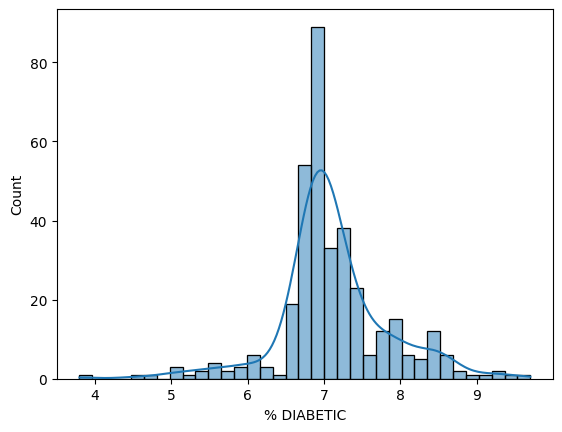

In [11]:
sns.histplot(data=model_data, x="% DIABETIC", kde=True)


### Diabetes Vs Inactivity

#### ScatterPlot

In [12]:
fig = px.scatter(model_data, x="% INACTIVE", y="% DIABETIC")
fig.show()

#### Histplots

<Axes: xlabel='% INACTIVE', ylabel='% DIABETIC'>

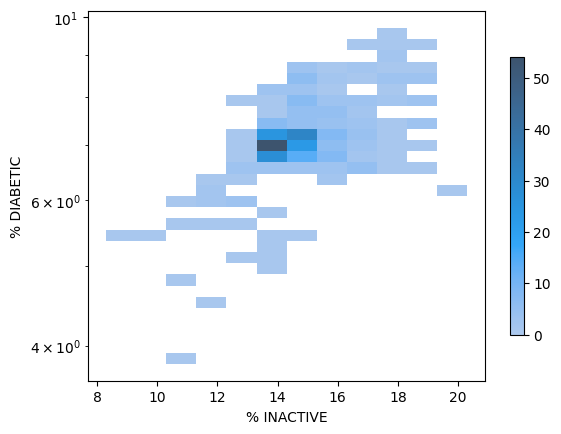

In [13]:
sns.histplot(
    model_data, x="% INACTIVE", y="% DIABETIC",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True, cbar_kws=dict(shrink=.75),
)

<Axes: ylabel='Count'>

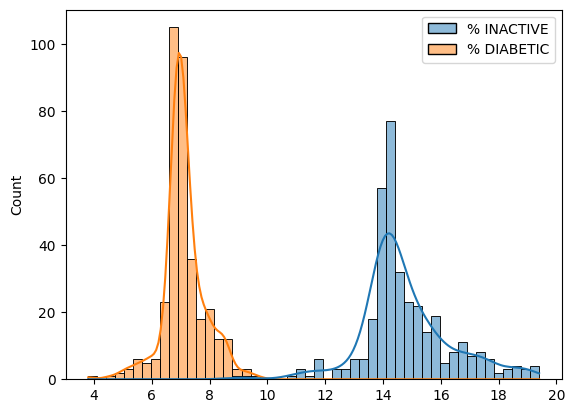

In [14]:
sns.histplot([model_data["% INACTIVE"],model_data["% DIABETIC"]], kde=True, bins = 50)

### Obesity Vs Inactivity

#### ScatterPlot

In [15]:
fig = px.scatter(model_data, x="% INACTIVE", y= "% OBESE")
fig.show()

#### Histplots

<Axes: xlabel='% OBESE', ylabel='% INACTIVE'>

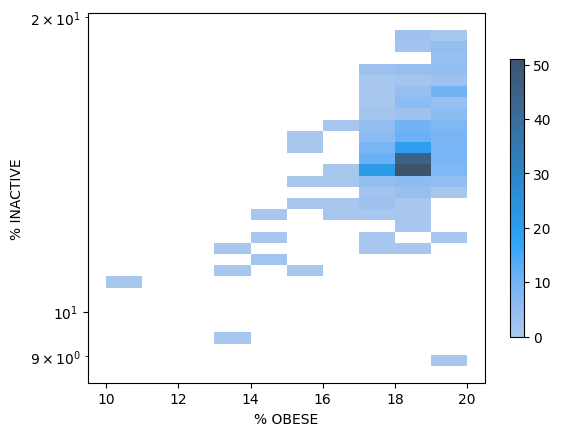

In [16]:
sns.histplot(
    model_data, x="% OBESE", y="% INACTIVE",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True, cbar_kws=dict(shrink=.75),
)

<Axes: ylabel='Count'>

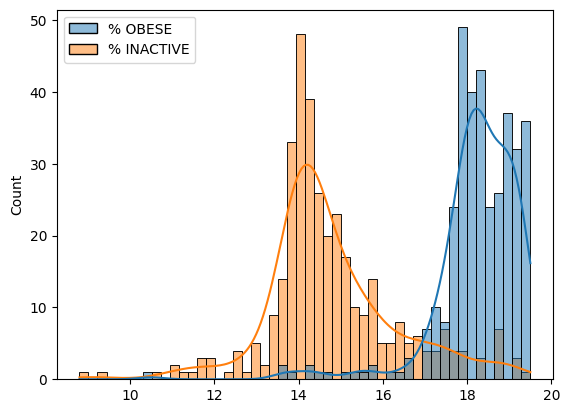

In [17]:
sns.histplot([model_data["% OBESE"],model_data["% INACTIVE"]], kde=True, bins = 50)

# Calculating mean, median, std dev. , skewness, kurtosis

In [18]:
## MEAN 
mean_diab = model_data["% DIABETIC"].mean()
mean_obes = model_data["% OBESE"].mean()
mean_inact = model_data["% INACTIVE"].mean()
## MEDIAN
median_diab = model_data["% DIABETIC"].median()
median_obes = model_data["% OBESE"].median()
median_inact = model_data["% INACTIVE"].median()
## STANDARD DEVIATION
std_diab = model_data["% DIABETIC"].std()
std_obes = model_data["% OBESE"].std()
std_inact = model_data["% INACTIVE"].std()
## SKEWNESS
skew_diab = skew(model_data["% DIABETIC"])
skew_obes = skew(model_data["% OBESE"])
skew_inact = skew(model_data["% INACTIVE"])
## KURTOSIS
kurt_diab = kurtosis(model_data["% DIABETIC"])
kurt_obes = kurtosis(model_data["% OBESE"])
kurt_inact = kurtosis(model_data["% INACTIVE"])

print(" stats for diabetes ----------------------")
print(" Mean for diabetes :", mean_diab)
print(" Median for diabetes :", median_diab)
print(" std dev. for diabetes :", std_diab)
print(" skewness for diabetes :", skew_diab)
print(" kurtosis for diabetes :", kurt_diab)
print()
print(" stats for obesity ----------------------")
print(" Mean for obesity :", mean_obes)
print(" Median for obesity :", median_obes)
print(" std dev. for obesity :", std_obes)
print(" skewness for obesity :", skew_obes)
print(" kurtosis for obesity :", kurt_obes)
print
print(" stats for inactivity ----------------------")
print(" Mean for inactivity :", mean_inact)
print(" Median for inactivity :", median_inact)
print(" std dev. for inactivity :", std_inact)
print(" skewness for inactivity :", skew_inact)
print(" kurtosis for inactivity :", kurt_inact)


 stats for diabetes ----------------------
 Mean for diabetes : 7.115819209039552
 Median for diabetes : 7.0
 std dev. for diabetes : 0.7284416453485657
 skewness for diabetes : -0.04881196867705582
 kurtosis for diabetes : 2.7884224412882883

 stats for obesity ----------------------
 Mean for obesity : 18.252542372881365
 Median for obesity : 18.3
 std dev. for obesity : 1.0294841964129622
 skewness for obesity : -2.7518886564555873
 kurtosis for obesity : 12.931524944445249
 stats for inactivity ----------------------
 Mean for inactivity : 14.776271186440676
 Median for inactivity : 14.4
 std dev. for inactivity : 1.5445423224177652
 skewness for inactivity : 0.4257113592530405
 kurtosis for inactivity : 1.6136007428789743


Skewness for % DIABETIC -0.04881196867705582


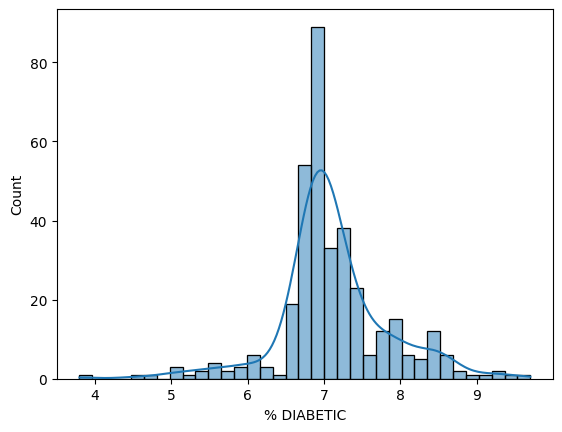

Skewness for % OBESE -2.7518886564555873


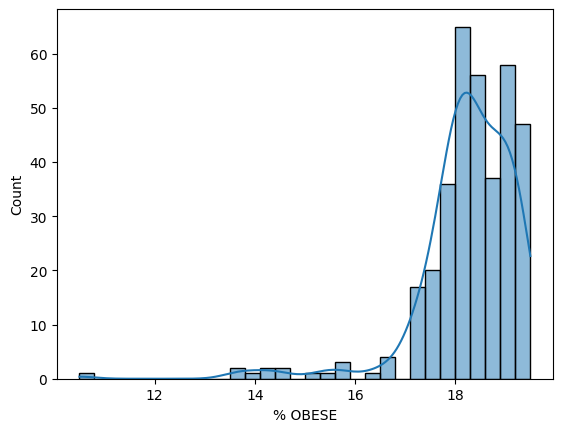

Skewness for % INACTIVE 0.4257113592530405


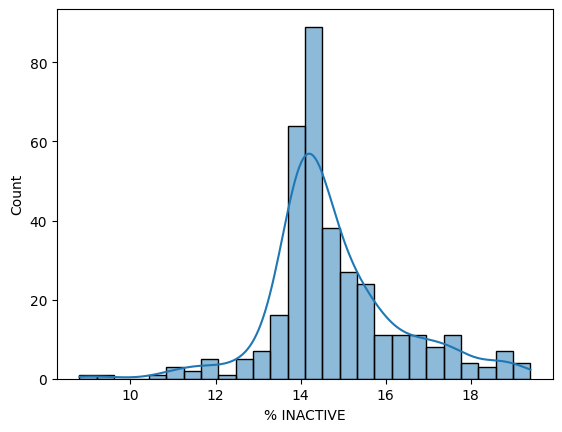

In [19]:
col_name = model_data.drop(['Year','County','FIPS','State'], axis=1)
for col in col_name:
    print("Skewness for",col,skew(col_name[col]))
    sns.histplot(col_name[col], kde=True) 
    plt.show()

# Correlation

<Axes: >

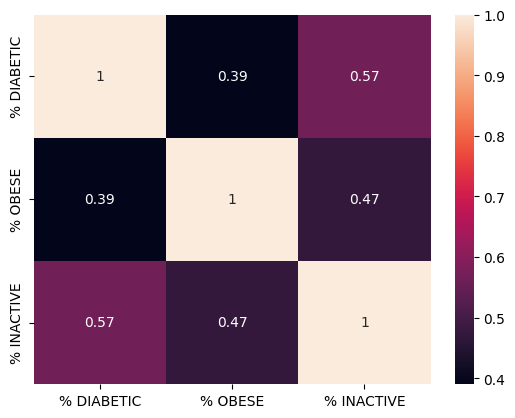

In [20]:
#finding the correlation by heatmap
sns.heatmap(col_name.corr(), annot=True)

As u can see the tareget variable has a bad correlation with obesity. so we need to handle the skewness 


Distribution on the basis of skewness value:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

kurtosis for normal distribution is equal to 3.
For a distribution having kurtosis < 3: It is called playkurtic.
For a distribution having kurtosis > 3, It is called leptokurtic 
and it signifies that it tries to produce more outliers rather than the normal distribution.

only inactivity skewness is > 0 and it is right skew
diab and obese skewness is < 0 and it is left skew

# Trying to apply log Transformations

#### As the data identified the skewness, we need to handle it by applying transformations

In [21]:
def apply_log(col_name, col, pos=0, bins=20):
    col_log = f'{col}_log'
    col_name.insert(loc=pos, column=col_log, value=np.log(col_name[col]))
    col_name[[col, col_log]].hist(figsize=(12,4), bins=bins)
    print(f'{col_log} skew: {col_name[col_log].skew()}')
    return

% DIABETIC_log skew: -0.9382965886018676
% OBESE_log skew: -3.611821977545721
% INACTIVE_log skew: -0.21843835216461832


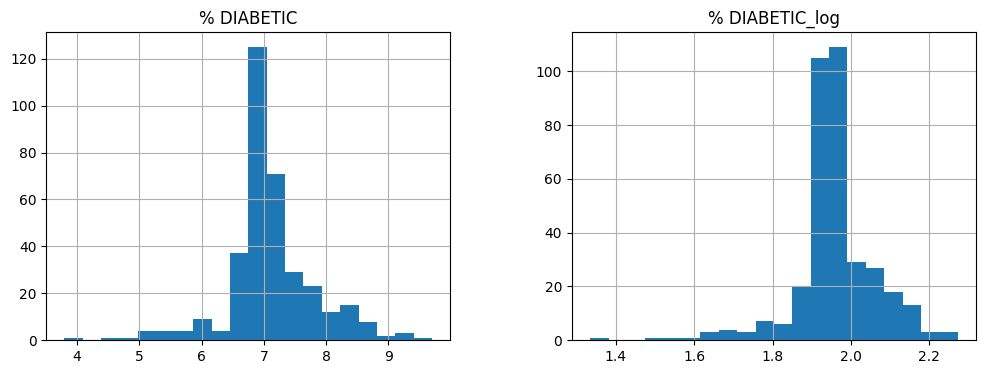

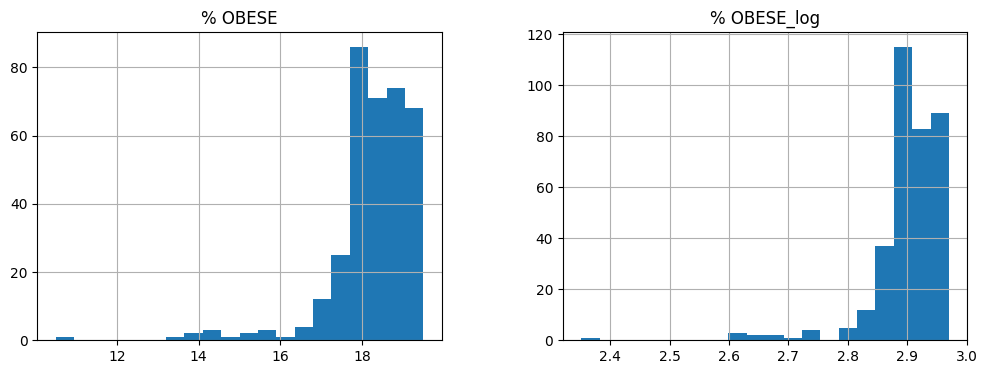

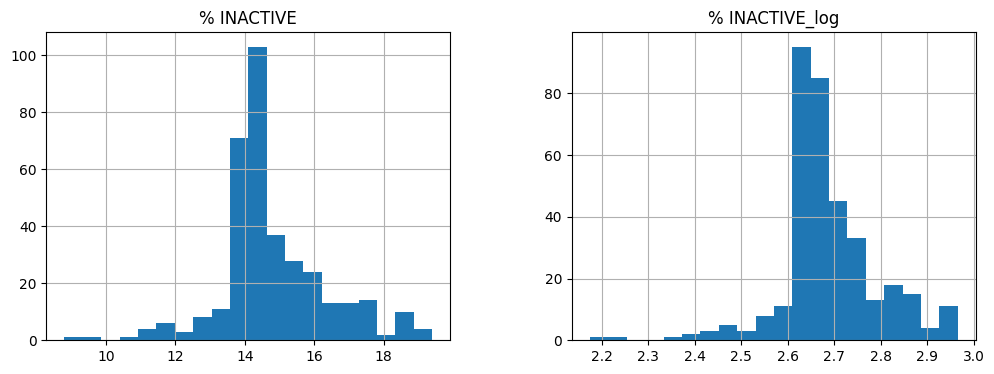

In [22]:
apply_log(col_name,'% DIABETIC', pos=1, bins=20)
apply_log(col_name,'% OBESE', pos=1, bins=20)
apply_log(col_name,'% INACTIVE', pos=1, bins=20)


# Simple linear regression

## Linear Model 1 : Independent Variable is Inactivity and Dependent Variable is Diabetics

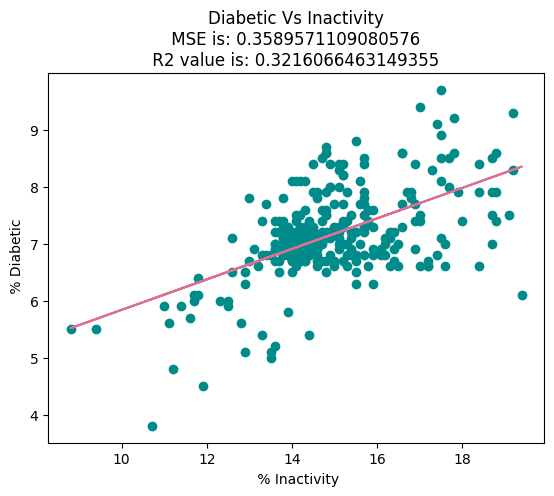

PearsonRResult(statistic=0.5671037350564144, pvalue=1.6326985821576947e-31)
spearman statistic:  0.4678103544401321
p-value of spearman 1.1901911631282765e-20
MSE is: 0.3589571109080576
R2 value is: 0.3216066463149355


In [28]:
#Diabetes Vs inactivity
X = model_data[["% INACTIVE"]]
y = model_data[["% DIABETIC"]]

model1 = LinearRegression() #model

model1.fit(X,y) #fit the model

y_pred = model1.predict(X) # make predictions

plt.scatter(X,y,color = 'darkcyan')
plt.plot(X, y_pred, color = 'palevioletred') # adding regression line
plt.xlabel(" % Inactivity")
plt.ylabel(" % Diabetic")
plt.title("Diabetic Vs Inactivity\n MSE is: 0.3589571109080576 \n R2 value is: 0.3216066463149355 ")
plt.show()
correlation1 =  stats.pearsonr(model_data['% INACTIVE'], model_data['% DIABETIC']) #pearson correlation
print(correlation1)
rho, p = spearmanr(model_data['% INACTIVE'], model_data['% DIABETIC']) #spearman correlation
print("spearman statistic: ", rho)
print("p-value of spearman", p)
MSE = metrics.mean_squared_error(y, y_pred)
print("MSE is:", MSE)
r2 = metrics.r2_score(y, y_pred)
print("R2 value is:", r2)

## Linear Model 2 : Independent Variable is Obesity and Dependent Variable is Diabetics

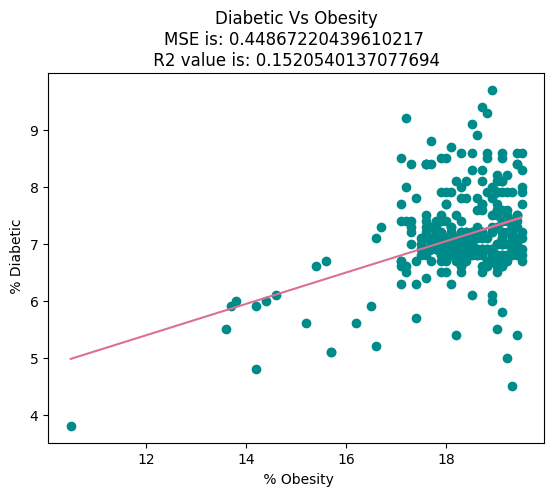

PearsonRResult(statistic=0.38994103875813, pvalue=2.6519793947079723e-14)
spearman statistic:  0.20028304562453594
p-value of spearman 0.00014854972313620697
MSE is: 0.44867220439610217
R2 value is: 0.1520540137077694


In [29]:
#Diabetes Vs obesity
X = model_data[["% OBESE"]]
y = model_data[["% DIABETIC"]]

model1 = LinearRegression() #model

model1.fit(X,y) #fit the model

y_pred = model1.predict(X) # make predictions

plt.scatter(X,y, color = "darkcyan")
plt.plot(X, y_pred, color = 'palevioletred') # adding regression line
plt.xlabel(" % Obesity")
plt.ylabel(" % Diabetic")
plt.title("Diabetic Vs Obesity\nMSE is: 0.44867220439610217 \n R2 value is: 0.1520540137077694 ")
plt.show()
correlation1 =  stats.pearsonr(model_data['% OBESE'], model_data['% DIABETIC']) #pearson correlation
print(correlation1)
rho, p = spearmanr(model_data['% OBESE'], model_data['% DIABETIC']) #spearman correlation
print("spearman statistic: ", rho)
print("p-value of spearman", p)
MSE = metrics.mean_squared_error(y, y_pred)
print("MSE is:", MSE)
r2 = metrics.r2_score(y, y_pred)
print("R2 value is:", r2)

## Linear Model 3 : Independent Variable is Inactivity and Dependent Variable is Obesity

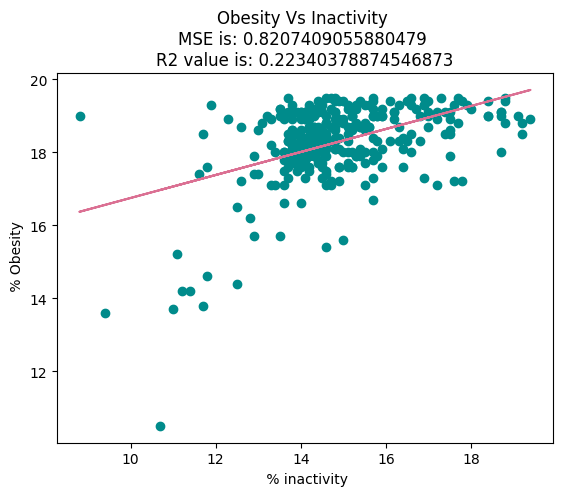

PearsonRResult(statistic=0.47265609987121604, pvalue=4.2074284712166415e-21)
spearman statistic:  0.3983209856425575
p-value for spearman 6.559544225646515e-15
MSE is: 0.8207409055880479
R2 value is: 0.22340378874546873


In [30]:
#obesity Vs Inactivity
X = model_data[["% INACTIVE"]]
y = model_data[["% OBESE"]]

model1 = LinearRegression() #model

model1.fit(X,y) #fit the model

y_pred = model1.predict(X) # make predictions

plt.scatter(X,y, color = 'darkcyan')
plt.plot(X, y_pred, color = 'palevioletred') # adding regression line
plt.xlabel(" % inactivity")
plt.ylabel(" % Obesity")
plt.title("Obesity Vs Inactivity \nMSE is: 0.8207409055880479 \nR2 value is: 0.22340378874546873")
plt.show()
correlation1 =  stats.pearsonr(model_data['% INACTIVE'], model_data['% OBESE']) #pearson correlation
print(correlation1)
rho, p = spearmanr(model_data['% INACTIVE'], model_data['% OBESE']) #spearman correlation
print("spearman statistic: ", rho)
print("p-value for spearman", p)
MSE = metrics.mean_squared_error(y, y_pred)
print("MSE is:", MSE)
r2 = metrics.r2_score(y, y_pred)
print("R2 value is:", r2)